In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# 母集団（平均4, 標準偏差 0.8 の正規分布）
population = stats.norm(loc=4, scale=0.8)

In [3]:
# 試行回数 10000 回のシミュレーションを行う
np.random.seed(1)
sample_mean_array = [population.rvs(size=10).mean() for _ in range(10000)]
sample_mean_array[:10]

[3.9222872873551196,
 3.864329294307713,
 4.0695300327636712,
 3.8571398669530952,
 4.1846541265897992,
 4.1419681996430198,
 4.3653423126389619,
 3.9115949279408726,
 4.1159233497220526,
 4.0518934186912841]

In [4]:
# 標本平均の基本統計量を調べる
# 平均
print('mean: {:.3f}'.format(sp.mean(sample_mean_array)))
# 不偏分散
print('std:  {:.3f}'.format(sp.std(sample_mean_array, ddof=1)))

mean: 4.004
std:  0.251


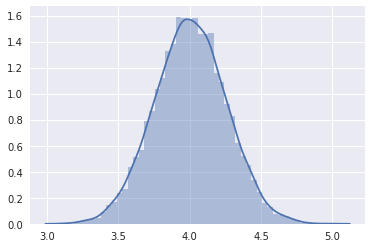

In [5]:
# 標本平均のヒストグラム（標本平均の標本分布）
import warnings
warnings.filterwarnings('ignore')

sns.distplot(sample_mean_array)

----
### サンプルサイズが大きいと、標本平均は母平均に近づく

- **対象**：標本平均
- **変化させるもの**：サンプルサイズ
- **調べたいこと**：サンプルサイズが大きくなると、標本平均は母平均に近づいていく

----

In [6]:
sample_sizes = np.arange(10, 100100, 100)  # 徐々にサンプルサイズを母平均のサイズまで大きくする

np.random.seed(1)
sample_mean_array = [population.rvs(size=sample_sizes[i]).mean() for i in range(len(sample_sizes))]

Text(0,0.5,'sample mean')

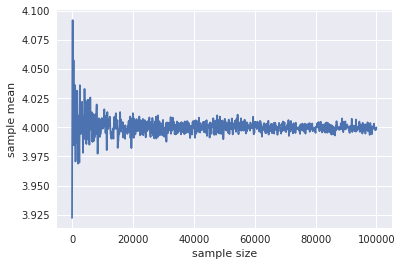

In [7]:
# サンプルサイズが大きくなるにつれ、標本平均は母平均に近づいていく
plt.plot(sample_sizes, sample_mean_array)
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [8]:
# シミュレーション用メソッド
'''
    size: サンプルサイズ
    n_trial: 試行回数
'''
def calc_sample_mean(size, n_trial):
    return [population.rvs(size=size).mean() for _ in range(n_trial)]

In [9]:
# サンプルサイズを変えたときの標本平均の分布
np.random.seed(1)

# サンプルサイズ 10
size_10 = calc_sample_mean(size=10, n_trial=10000)
df_size_10 = pd.DataFrame(
    {'sample_mean': size_10,
     'size': np.tile('size 10', 10000)}
)

# サンプルサイズ 20
size_20 = calc_sample_mean(size=20, n_trial=10000)
df_size_20 = pd.DataFrame(
    {'sample_mean': size_20,
     'size': np.tile('size 20', 10000)}
)

# サンプルサイズ 30
size_30 = calc_sample_mean(size=30, n_trial=10000)
df_size_30 = pd.DataFrame(
    {'sample_mean': size_30,
     'size': np.tile('size 30', 10000)}
)

# マージ
sim_result = pd.concat([df_size_10, df_size_20, df_size_30])
sim_result.head()

,sample_mean,size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10


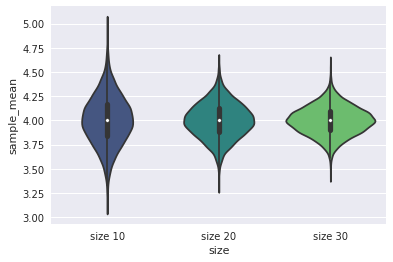

In [10]:
# サンプルサイズが大きくなるにつれ、標本平均のばらつきが小さくなっていく様が確認できる
sns.violinplot(x='size', y='sample_mean', data=sim_result, palette='viridis')

----
### 標本平均の標準偏差は、母標準偏差よりも小さい

- **対象**：標本平均の標準偏差
- **変化させるもの**：サンプルサイズ
- **調べたいこと**：サンプルサイズが大きくなると、標本平均の標準偏差は小さくなっていく　→　サンプルサイズを大きくすると、標本平均はより信頼できる値になっていく


----

In [11]:
sample_sizes = np.arange(2, 202, 2)

np.random.seed(1)
sample_mean_std_array = [sp.std(calc_sample_mean(sample_sizes[i], 100), ddof=1) for i in range(len(sample_sizes))]

Text(0,0.5,'sample mean std')

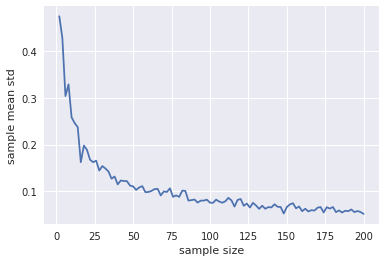

In [12]:
# サンプルサイズを大きくするとばらつきの少ない信頼できる標本平均が得られることが分かる
plt.plot(sample_sizes, sample_mean_std_array)
plt.xlabel('sample size')
plt.ylabel('sample mean std')

Text(0,0.5,'sample mean std')

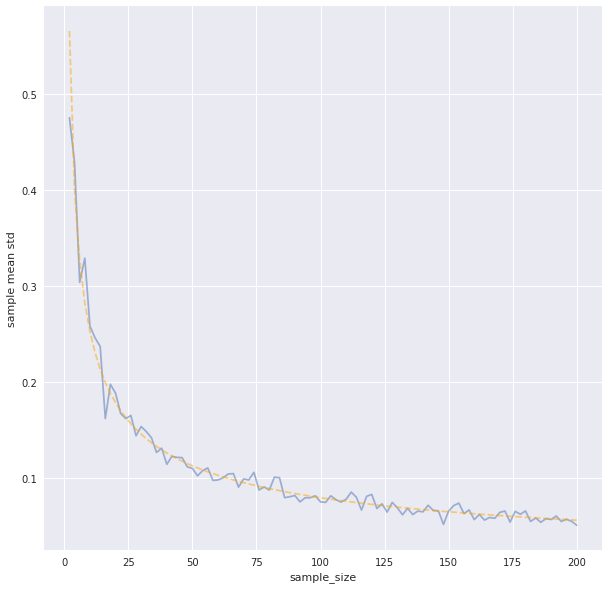

In [13]:
# ここでシミュレーションした標本平均の標準偏差は「標準誤差」と呼ばれる
standard_error = 0.8 / np.sqrt(sample_sizes)

# 上記の理論上の標準誤差の値とシミュレーションの結果を比較
plt.figure(figsize=(10, 10))
plt.plot(sample_sizes, sample_mean_std_array, alpha=0.5)
plt.plot(sample_sizes, standard_error, linestyle='--', color='orange', alpha=0.5)
plt.xlabel('sample_size')
plt.ylabel('sample mean std')

----
### （参考）標本分散を対象としたシミュレーション
----

In [14]:
np.random.seed(1)
sample_var_array = [sp.var(population.rvs(size=10), ddof=0) for _ in range(10000)]
sp.mean(sample_var_array)  # 0.575（標本分散の平均値） < 0.64（母分散）

0.57468868773321014

In [15]:
# 不偏分散で計算した場合を確認
np.random.seed(1)
sample_var_array = [sp.var(population.rvs(size=10), ddof=1) for _ in range(10000)]  # ddof=1 に
sp.mean(sample_var_array)  # 0.638（標本分散の平均値） ≒ 0.64（母分散）

0.63854298637023343

----
### サンプルサイズが大きいと、不偏分散は母分散に近づく

- **対象**：不偏分散
- **変化させるもの**：サンプルサイズ
- **調べたいこと**：サンプルサイズが大きくなると、不偏分散は母分散に近づいていく

----

In [16]:
sample_sizes = np.arange(10, 100100, 100)

np.random.seed(1)
unbias_var_array = [sp.var(population.rvs(size=sample_sizes[i]), ddof=1) for i in range(len(sample_sizes))]

Text(0,0.5,'unbias var')

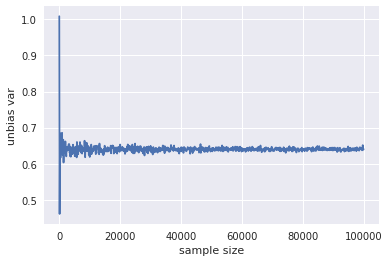

In [17]:
plt.plot(sample_sizes, unbias_var_array)
plt.xlabel('sample size')
plt.ylabel('unbias var')
# サンプルサイズが大きくなるにつれ、不偏分散が母分散（0.64）に近づいていく

----

## まとめ

- 標本平均の平均値は母平均とほぼ同じ（※1）
- 不偏分散の平均値は母分散とほぼ同じ（※1）
- サンプルサイズを大きくすると、標本平均は母平均に、普遍分散は母分散に、各々近づく（※2）

※1. 普遍性 - 推定量の期待値（平均値）が真の母数（母集団のパラメータ）となる特性<br>
※2. 一致性 - サンプルサイズが大きくなると、推定量が真の母数に近づいていく特性